### Data
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines.
https://archive.ics.uci.edu/ml/datasets/wine+quality

### Load libraries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Load data

In [2]:
white_wine = pd.read_csv('data/winequality-white.csv', delimiter = ';')
red_wine = pd.read_csv('data/winequality-red.csv', delimiter = ';')

### Combine data

In [3]:
white_wine['color'] = 0
red_wine['color'] = 1
df = pd.concat([white_wine, red_wine])

### Shape of data

In [4]:
print('Number of rows:', df.shape[0], '\nNumber of columns:', df.shape[1])
df.describe()

Number of rows: 6497 
Number of columns: 13


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


### Attributes types
We do not have nulls in our data

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


### Distribution plots

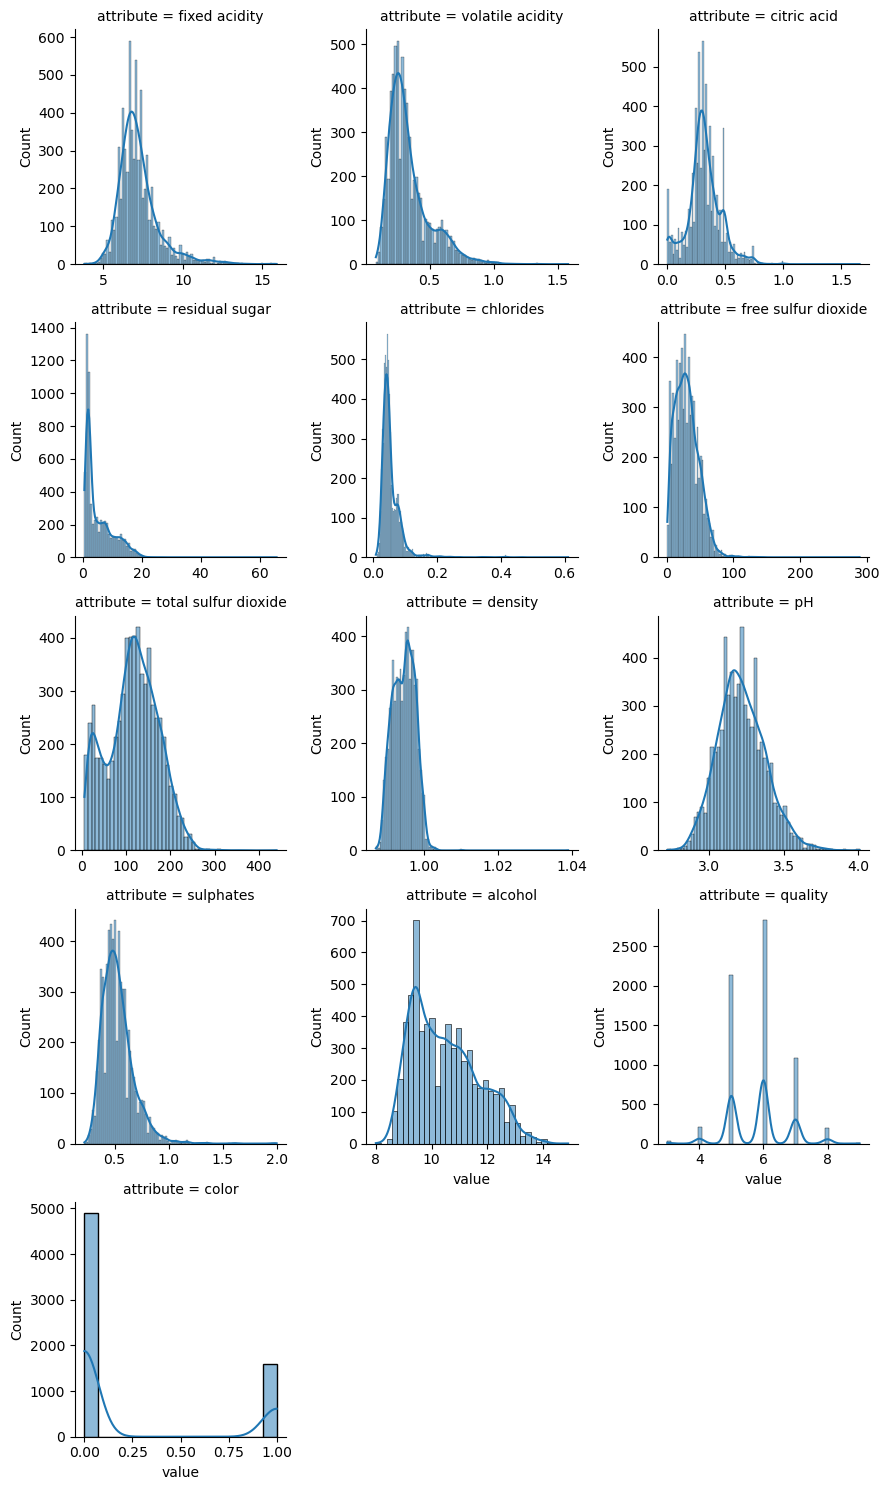

In [6]:
# Create a grid of distribution plots
hist_grid = sns.FacetGrid(pd.melt(df, var_name = 'attribute'), col = 'attribute', sharex=False, sharey=False, col_wrap=3)
hist_grid = hist_grid.map(sns.histplot, 'value', kde = True)

### Heatmap of correlations

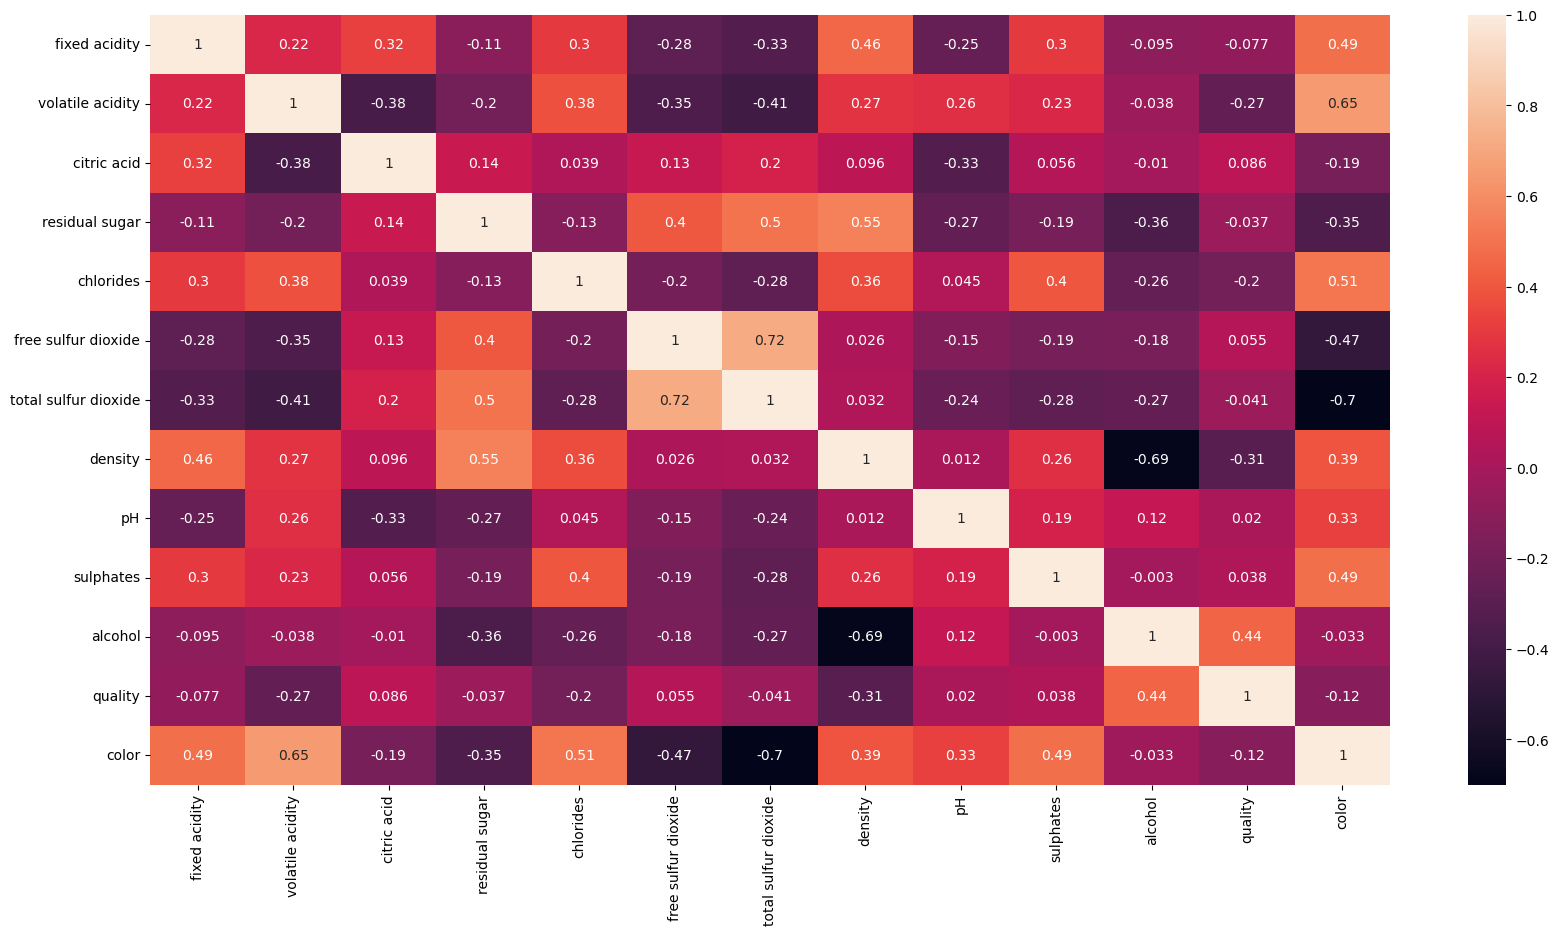

In [7]:
plt.subplots(figsize=(20, 10))
dataplot = sns.heatmap(df.corr(numeric_only = True), annot=True)

### Outliers
We will indetify outliers using boxplots

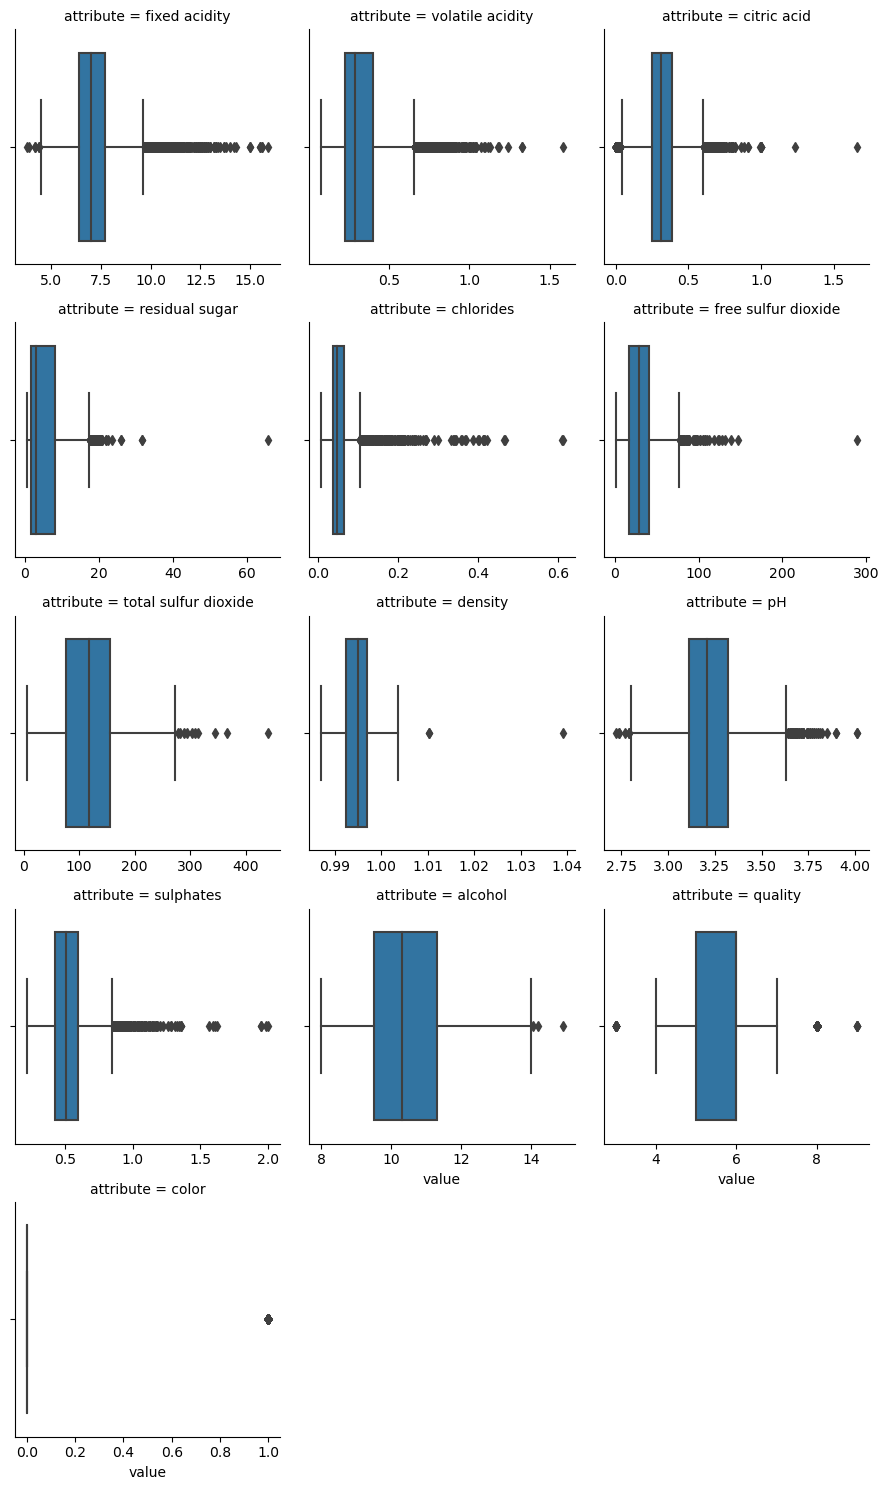

In [8]:
# Create a grid of box plots
box_grid = sns.FacetGrid(pd.melt(df, var_name = 'attribute'), col = 'attribute', sharex=False, sharey=False, col_wrap=3)
box_grid = box_grid.map(sns.boxplot, 'value', order = [])

# Data preprocessing

### Get rid of outliers
We calculated boundaries with mean and multiple of standard deviation. We deleted everything outside of these boundaries as outliers. We repeated this process for every column.<br>
*Is this good approach?*

In [9]:
""" filtered_columns = [col for col in df.columns if col not in ['color', 'quality']]
for i in filtered_columns:
    iqr = df[i].quantile(0.75)- df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)

    up_limit = q3 + 1.5 * iqr 
    with_outliers = df.shape[0]
    df = df[df[i] <= up_limit]
    print(f'Column {i}({with_outliers})\nOutliers {with_outliers - df.shape[0]}', end = '\n\n') """

" filtered_columns = [col for col in df.columns if col not in ['color', 'quality']]\nfor i in filtered_columns:\n    iqr = df[i].quantile(0.75)- df[i].quantile(0.25)\n    q3 = df[i].quantile(0.75)\n\n    up_limit = q3 + 1.5 * iqr \n    with_outliers = df.shape[0]\n    df = df[df[i] <= up_limit]\n    print(f'Column {i}({with_outliers})\nOutliers {with_outliers - df.shape[0]}', end = '\n\n') "

### Distribution graphs after outlier cleaning

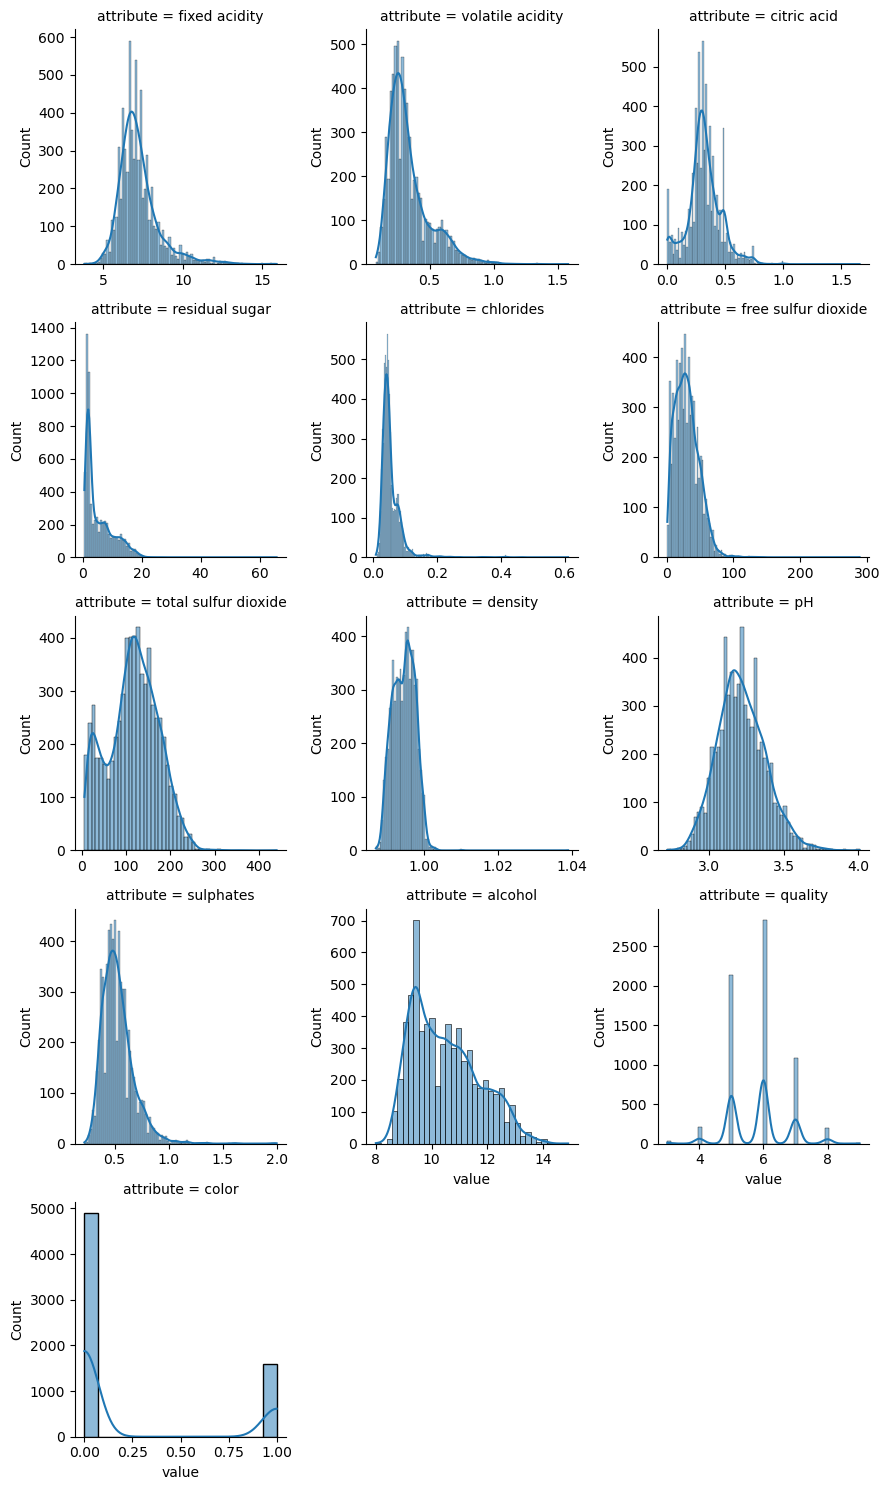

In [10]:
# Create a grid of distribution plots
hist_grid = sns.FacetGrid(pd.melt(df, var_name = 'attribute'), col = 'attribute', sharex=False, sharey=False, col_wrap=3)
hist_grid = hist_grid.map(sns.histplot, 'value', kde = True)

### Boxplots after outlier cleaning

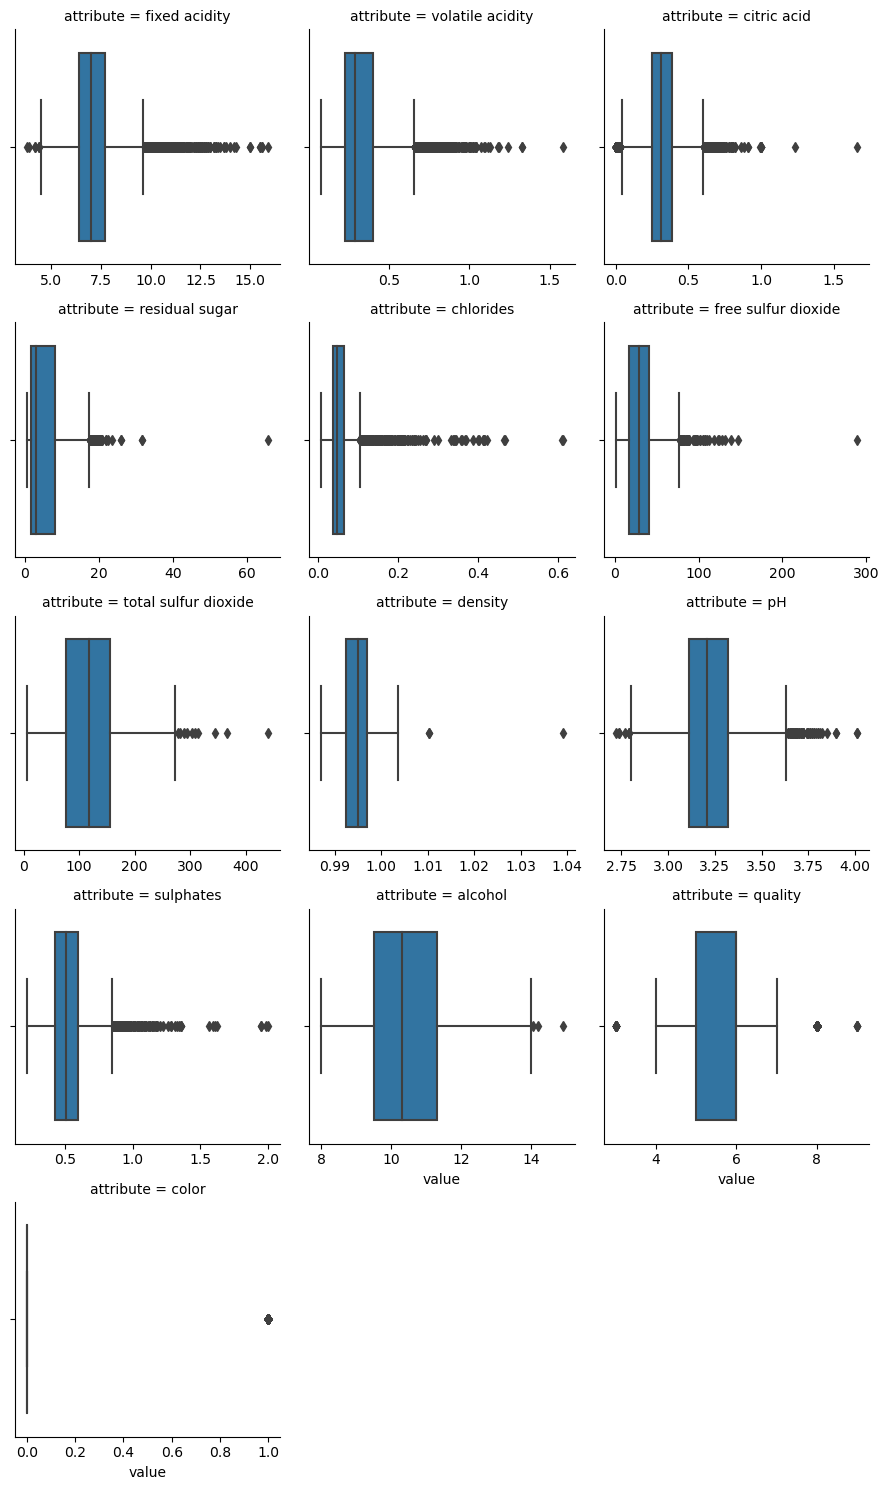

In [11]:
# Create a grid of box plots
box_grid = sns.FacetGrid(pd.melt(df, var_name = 'attribute'), col = 'attribute', sharex=False, sharey=False, col_wrap=3)
box_grid = box_grid.map(sns.boxplot, 'value', order = [])

### Save cleaned data

In [12]:
df.to_csv('data/cleaned_data.csv', sep = ';', index = False)